# Recommendation Systems Project

## Author: Abhinav Roy

### Date - 24/02/2023

In [261]:
# import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
import plotly.express as px # library for visualisations
%matplotlib inline
import missingno as msno

import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.
from scipy.stats import *
from scipy.spatial.distance import cdist
from math import *
'''
!pip install pandasql
import pandasql as psql
from pandasql import sqldf
'''
import string
alphabet = string.ascii_letters+string.punctuation

from mpl_toolkits.mplot3d import Axes3D

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

import time
from datetime import datetime

from collections import Counter

import pickle

import warnings # ignore warnings
warnings.filterwarnings("ignore")

In [262]:
# import machine learning algorithms
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
#from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
from sklearn.metrics import *
from sklearn import model_selection
#from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV, learning_curve
from sklearn.model_selection import *
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
#!pip install catboost
#from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# install and import SMOTE module from imblearn library
#!pip install imblearn
from imblearn.over_sampling import RandomOverSampler, SMOTENC, SMOTE

#!pip install eli5
#import eli5

In [455]:
# import neural network libraries
import tensorflow 
print(tensorflow.__version__)

from keras.utils.np_utils import to_categorical
from keras.utils.np_utils import *
from keras.models import Sequential # Forward prop
#from keras.layers import Dense, Activation, Dropout, BatchNormalization, LayerNormalization, SwitchableNormalization, LeakyReLU, ELU, Flatten
from keras.layers import *
from keras import optimizers

#Creating three callbacks - checkpoints, reduce_lr and early stopping

from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

2.11.0


## Part A

•	DOMAIN:  Electronics and Telecommunication
•	CONTEXT: A communications equipment manufacturing company has a product which is responsible for emitting informative signals. Company wants to build a machine learning model which can help the company to predict the equipment’s signal quality using various parameters.
•	DATA DESCRIPTION: The data set contains information on various signal tests performed:
1.	Parameters: Various measurable signal parameters.
2.	Signal_Quality: Final signal strength or quality

•	PROJECT OBJECTIVE: To build a classifier which can use the given parameters to determine the signal strength or quality.
Steps and tasks: [ Total Score: 30 Marks]
1.	Data import and Understanding [10 Marks]
A.	Read the ‘Signals.csv’ as DataFrame and import required libraries. [2 Marks]
B.	Check for missing values and print percentage for each attribute. [2 Marks]
C.	Check for presence of duplicate records in the dataset and impute with appropriate method. [2 Marks]
D.	Visualise distribution of the target variable. [2 Marks]
E.	Share insights from the initial data analysis (at least 2). [2 Marks]
2.	Data preprocessing [7 Marks]
A.	Split the data into X & Y. [1 Marks]
B.	Split the data into train & test with 70:30 proportion.[1 Marks]
C.	Print shape of all the 4 variables and verify if train and test data is in sync. [1 Marks]
D.	Normalise the train and test data with appropriate method. [2 Marks]
E.	Transform Labels into format acceptable by Neural Network [2 Marks]
3.	Model Training & Evaluation using Neural Network [13 Marks]
A.	Design a Neural Network to train a classifier. [3 Marks]
B.	Train the classifier using previously designed Architecture [2 Marks]
C.	Plot 2 separate visuals. [3 Marks]
i.	Training Loss and Validation Loss
ii.	Training Accuracy and Validation Accuracy
D.	Design new architecture/update existing architecture in attempt to improve the performance of the model. [2 Marks]
E.	Plot visuals as in Q3.C and share insights about difference observed in both the models. [3 Marks]


### 1.	Data import and Understanding 

In [264]:
# mount drive onto colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [265]:
# A.	Read the ‘Signals.csv’ as DataFrame and import required libraries
df_signal = pd.read_csv('/content/drive/MyDrive/Great_Learning_Repos/00/04_GL_Projects/07_Neural_Networks/NN Project Data - Signal.csv')

In [266]:
df_signal.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [267]:
# dataframe shape
print(f'Dataframe shape: Rows: {df_signal.shape[0]} and Columns: {df_signal.shape[1]}\n')

Dataframe shape: Rows: 1599 and Columns: 12



In [268]:
# dataframe 5-point summary
df_signal.describe().T

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
Parameter 2,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
Parameter 3,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
Parameter 4,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
Parameter 5,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
Parameter 6,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
Parameter 7,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
Parameter 8,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
Parameter 9,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
Parameter 10,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [269]:
# dataframe information
df_signal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


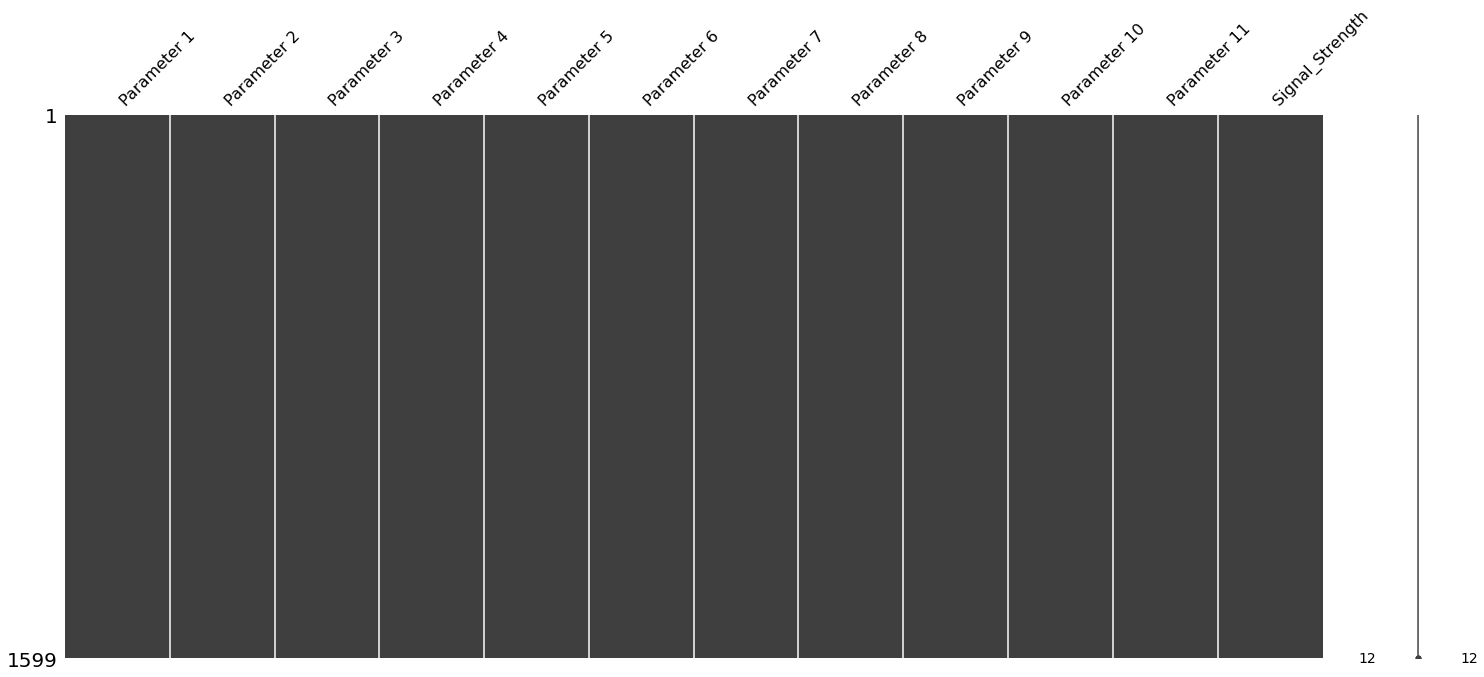

In [270]:
# Visualising Nulls in the dataframe
msno.matrix(df_signal);

In [271]:
# create dataframe copy
df_signal_1 = df_signal.copy(deep = True)
df_signal_1.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [272]:
# B.	Check for missing values and print percentage for each attribute. 
percent_missing = (df_signal_1.isna().sum()/ len(df_signal_1)) * 100
percent_missing.to_frame()

,0
Parameter 1,0.0
Parameter 2,0.0
Parameter 3,0.0
Parameter 4,0.0
Parameter 5,0.0
Parameter 6,0.0
Parameter 7,0.0
Parameter 8,0.0
Parameter 9,0.0
Parameter 10,0.0


In [273]:
# C.	Check for presence of duplicate records in the dataset and impute with appropriate method
def remove_duplicates(df):

  if df.duplicated().any() == True:
    print('Number of Duplicates rows in the dataframe: {}'.format(df.duplicated().sum()))
    
    # Drop duplicate rows
    df.drop_duplicates(keep = 'first', inplace = True)
    
    print('Number of Duplicates in the dataframe after dropping rows: {}'.format(df.duplicated().sum()))
  else:
    print('There are no Duplicate rows in the dataframe')

In [274]:
remove_duplicates(df_signal_1)

Number of Duplicates rows in the dataframe: 240
Number of Duplicates in the dataframe after dropping rows: 0


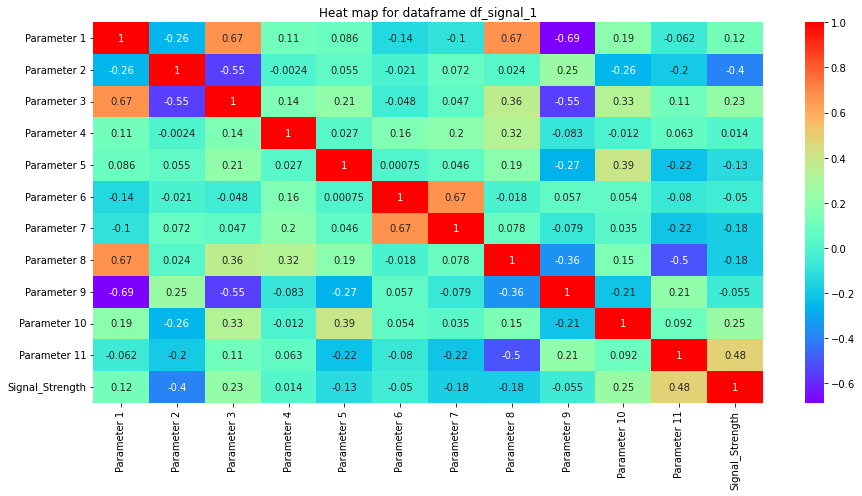

In [275]:
# Plotting the heat map for dataframe df
plt.figure(figsize = (15,7))
plt.title('Heat map for dataframe df_signal_1')
sns.heatmap(df_signal_1.corr(), annot = True, cmap = 'rainbow');

In [276]:
# D.	Visualise distribution of the target variable. 
# Function that will accept a DataFrame as input and return Histogram & Boxplot for all the appropriate Numerical features
def num_var_distn(df, fig_size_x = 15, fig_size_y = 3):
    
    num_cols = df.select_dtypes(exclude = 'object').columns.to_list()

    for i in num_cols:
        fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (fig_size_x, fig_size_y))
        plt.suptitle("Histogram & Boxplot for {} feature".format(i), ha = 'center')
        sns.histplot(data = df, x = i, ax = ax[0], fill = True, kde = True, color = 'Purple')
        sns.boxplot(data = df, x = i, ax = ax[1], color = 'Orange')
        #ax.invert_yaxis()
        #checking count of outliers
        q25, q75 = np.percentile(df[i], 25), np.percentile(df[i], 75)
        IQR = q75 - q25
        Threshold = IQR * 1.5
        lower, upper = q25 - Threshold, q75 + Threshold
        Outliers = [i for i in df[i] if i < lower or i > upper]
        print('{} Total Number of outliers in {}: {}'.format('\033[1m',i,len(Outliers)))

 Total Number of outliers in Parameter 1: 41
 Total Number of outliers in Parameter 2: 19
 Total Number of outliers in Parameter 3: 1
 Total Number of outliers in Parameter 4: 126
 Total Number of outliers in Parameter 5: 87
 Total Number of outliers in Parameter 6: 26
 Total Number of outliers in Parameter 7: 45
 Total Number of outliers in Parameter 8: 35
 Total Number of outliers in Parameter 9: 28
 Total Number of outliers in Parameter 10: 55
 Total Number of outliers in Parameter 11: 12
 Total Number of outliers in Signal_Strength: 27


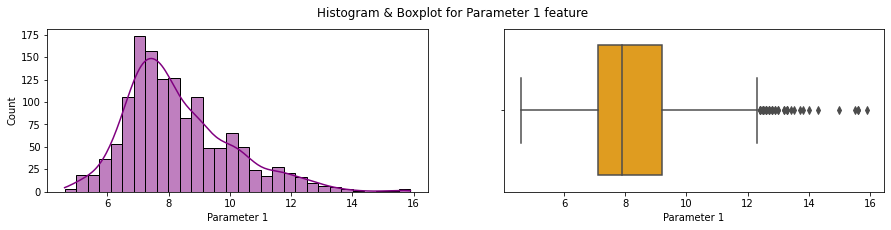

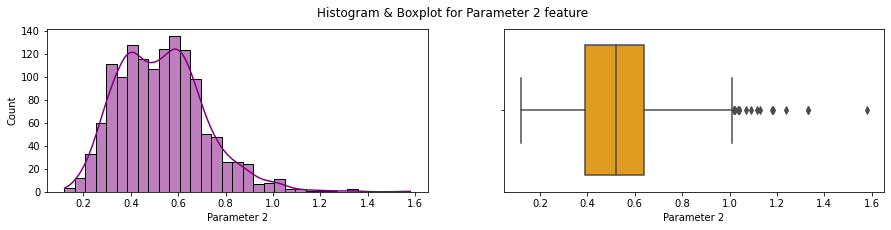

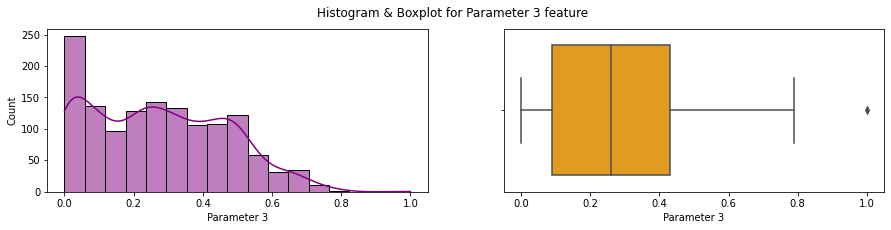

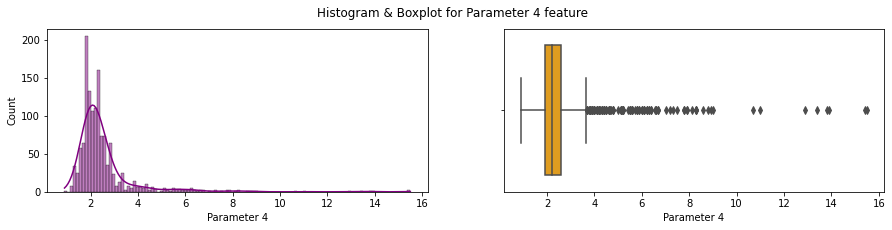

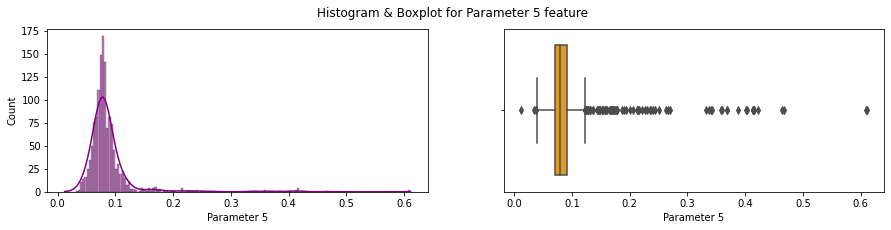

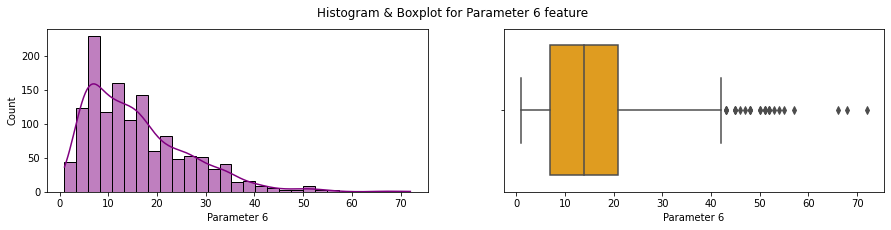

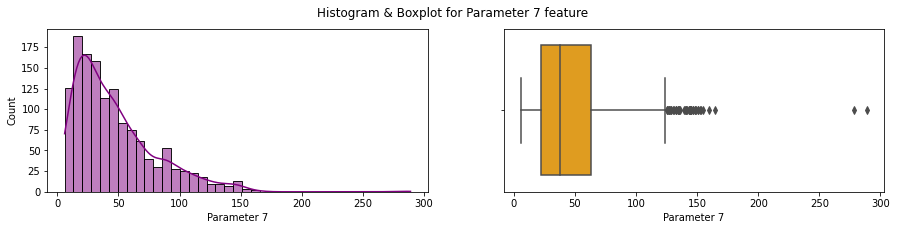

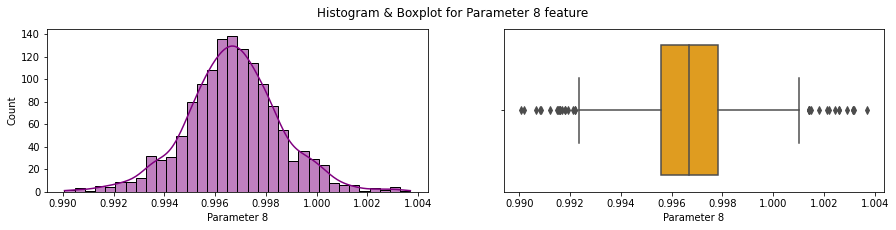

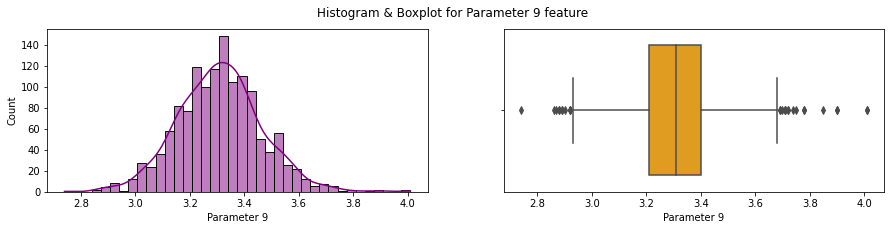

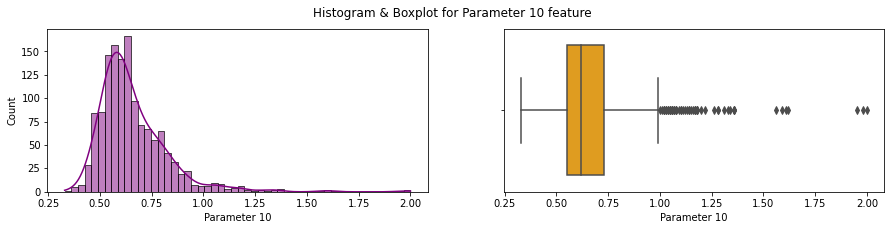

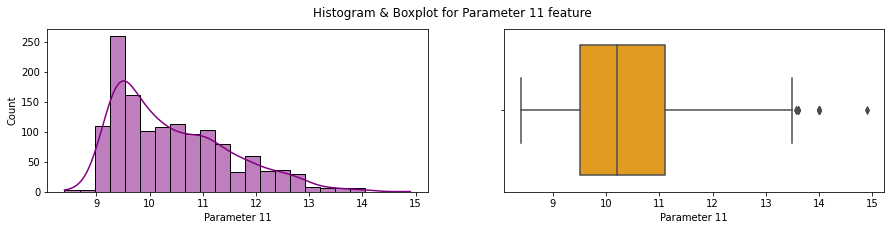

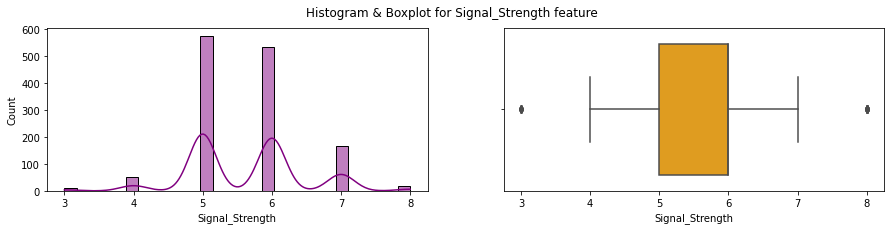

In [277]:
# Calling the function to plot Histogram & Boxplot for all Numerical features
num_var_distn(df_signal_1)

In [278]:
# Feature Importance
def feat_impt(df, target):

  # Independent variables
  X = df.drop(target, axis = 1) 

  # Target variable
  Y = df[target]               


  from sklearn.ensemble import ExtraTreesClassifier
  import matplotlib.pyplot as plt
  model = ExtraTreesClassifier()
  model.fit(X,Y)

  #using inbuilt class "feature_importances" of tree based classifiers
  print(model.feature_importances_) 

  #ploting graph of feature importances
  feat_importances = pd.Series(model.feature_importances_, index = X.columns)
  feat_importances.nlargest(10).plot(kind = 'bar', color = 'Pink')
  plt.show();

[0.07702081 0.09578973 0.07841196 0.07808855 0.07730011 0.07440278
 0.10496036 0.08167142 0.07797399 0.10256256 0.15181772]


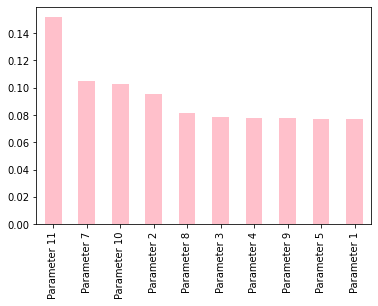

In [279]:
feat_impt(df_signal_1, 'Signal_Strength')

#### Observations:

 E.	Share insights from the initial data analysis (at least 2).

 1) Parameter 1 has a strong negative correlation with Parameters 2, 6, 7, 11.

 2) The signal strength from all the Parameters is uniformly distributed(symmetric box plot) between 5 and 6, with very few outlier signal strengths.
 
 3) Parameter 11 is the most important to determine the signal strength, followed by Parameters 7 and 10.

### 2.	Data preprocessing 

In [280]:
# A.	Split the data into X & Y. 
# Independent variables
X = df_signal_1.drop('Signal_Strength', axis=1) 

# Target variable
Y = df_signal_1['Signal_Strength']      

In [281]:
# B.	Split the data into train & test with 70:30 proportion        
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, train_size = 0.7, random_state = 1)

In [282]:
# D.	Normalise the train and test data with appropriate method
# Scaling train data
X_Train_S = StandardScaler().fit_transform(X_Train) 

# Scaling test data
X_Test_S = StandardScaler().fit_transform(X_Test)    

In [283]:
# E.	Transform Labels into format acceptable by Neural Network 
# Converting y data into categorical (one-hot encoding)
Y_Train = to_categorical(Y_Train)
Y_Test = to_categorical(Y_Test)

In [284]:
# C.	Print shape of all the 4 variables and verify if train and test data is in sync
print(X_Train_S.shape)
print(X_Test_S.shape)
print(Y_Train.shape)
print(Y_Test.shape)

(951, 11)
(408, 11)
(951, 9)
(408, 9)


## 3.	Model Training & Evaluation using Neural Network 

In [285]:
# A.	Design a Neural Network to train a classifier. 
NN_model_Classifier = Sequential()

# The Input Layer :
NN_model_Classifier.add(Dense(128, kernel_initializer='normal',input_dim = X_Train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model_Classifier.add(Dense(64, kernel_initializer='normal',activation='relu'))  # sigmoid, tanh

NN_model_Classifier.add(Dense(32, kernel_initializer='normal'))
NN_model_Classifier.add(LeakyReLU(alpha=0.1))

NN_model_Classifier.add(Dense(16, kernel_initializer='normal'))
NN_model_Classifier.add(LeakyReLU(alpha=0.1))


# The Output Layer :
NN_model_Classifier.add(Dense(9, kernel_initializer='normal',activation='softmax'))  # except softmax

# Compile the network :
NN_model_Classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
NN_model_Classifier.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_140 (Dense)           (None, 128)               1536      
                                                                 
 dense_141 (Dense)           (None, 64)                8256      
                                                                 
 dense_142 (Dense)           (None, 32)                2080      
                                                                 
 leaky_re_lu_44 (LeakyReLU)  (None, 32)                0         
                                                                 
 dense_143 (Dense)           (None, 16)                528       
                                                                 
 leaky_re_lu_45 (LeakyReLU)  (None, 16)                0         
                                                                 
 dense_144 (Dense)           (None, 9)               

In [286]:
# B.	Train the classifier using previously designed Architecture 
EPOCH = 50
BATCH_SIZE = 500
Network_Classifier = NN_model_Classifier.fit(X_Train_S, Y_Train, validation_data = (X_Test_S, Y_Test), epochs = EPOCH, batch_size = BATCH_SIZE)

Epoch 1/50
2/2 [==============================] - 1s 209ms/step - loss: 2.1965 - accuracy: 0.2871 - val_loss: 2.1941 - val_accuracy: 0.3775
Epoch 2/50
2/2 [==============================] - 0s 36ms/step - loss: 2.1932 - accuracy: 0.4048 - val_loss: 2.1904 - val_accuracy: 0.4191
Epoch 3/50
2/2 [==============================] - 0s 36ms/step - loss: 2.1895 - accuracy: 0.3901 - val_loss: 2.1864 - val_accuracy: 0.4363
Epoch 4/50
2/2 [==============================] - 0s 38ms/step - loss: 2.1853 - accuracy: 0.3996 - val_loss: 2.1819 - val_accuracy: 0.4314
Epoch 5/50
2/2 [==============================] - 0s 35ms/step - loss: 2.1806 - accuracy: 0.3922 - val_loss: 2.1767 - val_accuracy: 0.4240
Epoch 6/50
2/2 [==============================] - 0s 45ms/step - loss: 2.1753 - accuracy: 0.3901 - val_loss: 2.1705 - val_accuracy: 0.4240
Epoch 7/50
2/2 [==============================] - 0s 36ms/step - loss: 2.1688 - accuracy: 0.3891 - val_loss: 2.1631 - val_accuracy: 0.4216
Epoch 8/50
2/2 [==========

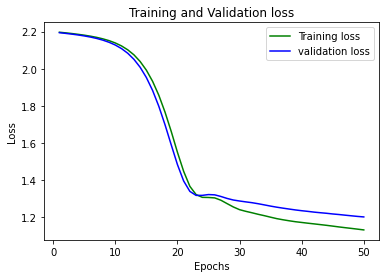

In [287]:
# C.	Plot 2 separate visuals. 
# i.	Training Loss and Validation Loss
loss_train = Network_Classifier.history['loss']
loss_val = Network_Classifier.history['val_loss']
epochs = range(1,EPOCH+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show();

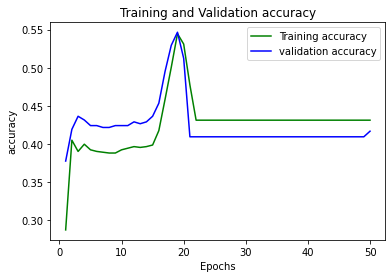

In [288]:
# ii.	Training Accuracy and Validation Accuracy
Acc_train = Network_Classifier.history['accuracy']
Acc_val = Network_Classifier.history['val_accuracy']
epochs = range(1,EPOCH+1)
plt.plot(epochs, Acc_train, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show();

#### Observations:

1) Training and Validation loss - Initially, the Training and Validation loss decrease together uniformaly, after epoch 24 the Training loss starts to decrease much quicker than validation loss.

2) Training and Validation accuracy - The Validation accuracy is higher than Validation accuracy until epoch 19, after which the Validation and Training accuracy fall sharply, and the become constant.


In [ ]:
# define callbacks
checkpoint = ModelCheckpoint('model.h5', monitor = 'val_accuracy', mode = 'max', save_weights_only = False, verbose = 1)
reduce_lr  = ReduceLROnPlateau(monitor = 'val_loss', patience = 2, factor = 0.1, min_lr = 0.00001, model = 'auto')
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 3)

callbacks = [checkpoint, reduce_lr, early_stop]

In [471]:
# D.	Design new architecture/update existing architecture in attempt to improve the performance of the model. 
NN_model_Classifier_1 = Sequential()

# The Input Layer :
NN_model_Classifier_1.add(Dense(128, kernel_initializer = 'Orthogonal', input_dim = X_Train.shape[1], activation = 'ELU'))

# The Hidden Layers :
NN_model_Classifier_1.add(Dense(64, kernel_initializer = 'Orthogonal', activation = 'ELU'))  # sigmoid, tanh, relu
NN_model_Classifier_1.add(LayerNormalization())
NN_model_Classifier_1.add(Dropout(0.5))

NN_model_Classifier_1.add(Dense(32, kernel_initializer = 'Orthogonal'))
NN_model_Classifier_1.add(ELU(alpha = 0.2))
NN_model_Classifier_1.add(LayerNormalization())
NN_model_Classifier_1.add(Dropout(0.5))

NN_model_Classifier_1.add(Dense(16, kernel_initializer = 'Orthogonal'))
NN_model_Classifier_1.add(ELU(alpha = 0.2))
NN_model_Classifier_1.add(LayerNormalization())
NN_model_Classifier_1.add(Dropout(0.5))

# The Output Layer :
NN_model_Classifier_1.add(Dense(9, kernel_initializer = 'Orthogonal', activation = 'softmax'))  # except softmax

# Compile the network :
NN_model_Classifier_1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
NN_model_Classifier_1.summary()

Model: "sequential_92"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_454 (Dense)           (None, 128)               1536      
                                                                 
 dense_455 (Dense)           (None, 64)                8256      
                                                                 
 layer_normalization_30 (Lay  (None, 64)               128       
 erNormalization)                                                
                                                                 
 dropout_235 (Dropout)       (None, 64)                0         
                                                                 
 dense_456 (Dense)           (None, 32)                2080      
                                                                 
 elu_128 (ELU)               (None, 32)                0         
                                                     

In [472]:
# Train the classifier using previously designed Architecture 
EPOCH = 50
BATCH_SIZE = 500
Network_Classifier_1 = NN_model_Classifier_1.fit(X_Train_S, Y_Train, validation_data = (X_Test_S, Y_Test), epochs = EPOCH, batch_size = BATCH_SIZE, verbose = 1, callbacks = callbacks)

Epoch 1/50
1/2 [==============>...............] - ETA: 2s - loss: 2.9404 - accuracy: 0.1140
Epoch 1: saving model to model.h5
2/2 [==============================] - 2s 398ms/step - loss: 2.9016 - accuracy: 0.1251 - val_loss: 2.2331 - val_accuracy: 0.2819 - lr: 0.0010
Epoch 2/50
1/2 [==============>...............] - ETA: 0s - loss: 2.7520 - accuracy: 0.1620
Epoch 2: saving model to model.h5
2/2 [==============================] - 0s 92ms/step - loss: 2.7412 - accuracy: 0.1598 - val_loss: 1.9486 - val_accuracy: 0.3775 - lr: 0.0010
Epoch 3/50
1/2 [==============>...............] - ETA: 0s - loss: 2.5861 - accuracy: 0.1940
Epoch 3: saving model to model.h5
2/2 [==============================] - 0s 95ms/step - loss: 2.5464 - accuracy: 0.1819 - val_loss: 1.7565 - val_accuracy: 0.4485 - lr: 0.0010
Epoch 4/50
1/2 [==============>...............] - ETA: 0s - loss: 2.5323 - accuracy: 0.1840
Epoch 4: saving model to model.h5
2/2 [==============================] - 0s 102ms/step - loss: 2.4440 - ac

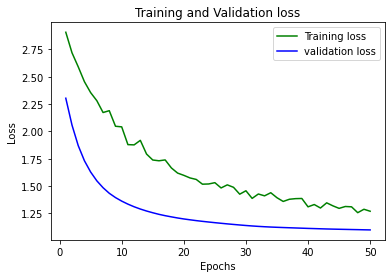

In [465]:
# E.	Plot visuals as in Q3.C and share insights about difference observed in both the models. 
loss_train = Network_Classifier_1.history['loss']
loss_val = Network_Classifier_1.history['val_loss']
epochs = range(1,EPOCH+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show();

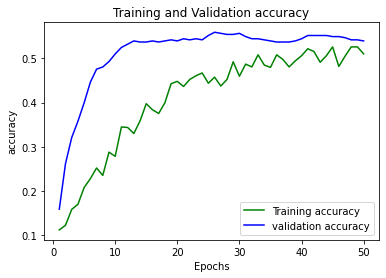

In [466]:
# E.	Plot visuals as in Q3.C and share insights about difference observed in both the models. 
Acc_train = Network_Classifier_1.history['accuracy']
Acc_val = Network_Classifier_1.history['val_accuracy']
epochs = range(1,EPOCH+1)
plt.plot(epochs, Acc_train, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show();

#### Observations:

1) Both Validation loss/ accuracy is better than the Training loss/ accuracy.

2) Overall the tuned perform model performs better than the base model, as the Validation loss for the tuned model decreases from 1.2 to 1.0 and the Validation accuracy increases from 40.93% to 52.94-54.05% upto 50 epochs.

## End of Part A

## Part B

•	DOMAIN:  Autonomous Vehicles
•	CONTEXT: A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions of geo-located 360-degree panoramic images.
The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising numbers in photographs is a problem of interest to the optical character recognition community.
While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character arrangements.
The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.

•	DATA DESCRIPTION: The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognising digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.




Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively.
The dataset has been provided in the form of h5py files. You can read about this file format here: https://docs.h5py.org/en/stable/
Acknowledgement: Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. Ng Reading Digits in Natural Images with Unsupervised Feature Learning NIPS Workshop on Deep Learning and Unsupervised Feature Learning 2011. PDF
http://ufldl.stanford.edu/housenumbers as the URL for this site.


•	PROJECT OBJECTIVE: To build a digit classifier on the SVHN (Street View Housing Number) dataset.
Steps and tasks: [ Total Score: 30 Marks]
1.	Data Import and Exploration [5 Marks]
A.	Read the .h5 file and assign to a variable. [2 Marks]
B.	Print all the keys from the .h5 file. [1 Marks]
C.	Split the data into X_train, X_test, Y_train, Y_test [2 Marks]
2.	Data Visualisation and preprocessing [13 Marks]
A.	Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync. [1 Marks]
B.	Visualise first 10 images in train data and print its corresponding labels. [4 Marks]
C.	Reshape all the images with appropriate shape update the data in same variable. [3 Marks]
D.	Normalise the images i.e. Normalise the pixel values. [2 Marks]
E.	Transform Labels into format acceptable by Neural Network [2 Marks]
F.	Print total Number of classes in the Dataset. [1 Marks]
3.	Model Training & Evaluation using Neural Network [12 Marks]
A.	Design a Neural Network to train a classifier. [3 Marks]
B.	Train the classifier using previously designed Architecture (Use best suitable parameters). [3 Marks]
C.	Evaluate performance of the model with appropriate metrics. [2 Marks]
D.	Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same. [4 Marks]


### 1.	Data Import and Exploration 

In [480]:
# A.	Read the .h5 file and assign to a variable. 
import h5py

# Open the file as readonly
h5f = h5py.File('/content/drive/MyDrive/Great_Learning_Repos/00/04_GL_Projects/07_Neural_Networks/Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

In [481]:
# B.	Print all the keys from the .h5 file. 
h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [482]:
# C.	Split the data into X_train, X_test, Y_train, Y_test 
x_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
x_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

## 2.	Data Visualisation and preprocessing 

In [483]:
# A.	Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync. 
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(42000, 32, 32)
(18000, 32, 32)
(42000,)
(18000,)


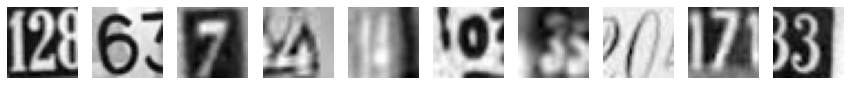

Label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [484]:
# B.	Visualise first 10 images in train data and print its corresponding labels. 
plt.figure(figsize = (15, 7))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i], cmap = "gray")
    plt.axis('off')
plt.show()
print('Label for each of the above image: %s' % (y_train[0:10]))

Need to reshape the X_train and X_test so that the same can be fed for model building. Currently we have a 3D tensor and we need to feed a 2D tensor into the model.

We will normalize the data. We divide by 255 as this is a grayscale image and can take values from 0-255

In [485]:
# C.	Reshape all the images with appropriate shape update the data in same variable. 
x_train = x_train.reshape(x_train.shape[0], 1024, 1)
x_test = x_test.reshape(x_test.shape[0], 1024, 1)

In [486]:
# D.	Normalise the images i.e. Normalise the pixel values. 
# # normalize inputs from 0-255 to 0-1
X_train = x_train / 255.0
X_test = x_test / 255.0

print('Resized Training set', X_train.shape, y_train.shape)
print('Resized Test set', X_test.shape, y_test.shape)

Resized Training set (42000, 1024, 1) (42000,)
Resized Test set (18000, 1024, 1) (18000,)


In [487]:
# E.	Transform Labels into format acceptable by Neural Network 
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [488]:
# F.	Print total Number of classes in the Dataset. 
# no. of classes
num_classes = y_test.shape[1] 
print("The number of classes in this dataset are:", num_classes)

The number of classes in this dataset are: 10


## 3.	Model Training & Evaluation using Neural Network 

In [489]:
# A.	Design a Neural Network to train a classifier.  
# define model

def nn_model():
    # create model
    model = Sequential()  
    model.add(Flatten())
    model.add(Dense(256, activation = 'relu')) ###Multiple Dense units with Relu activation
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(32, activation = 'relu'))
    model.add(Dense(num_classes, activation = 'softmax'))
    return model

In [490]:
# B.	Train the classifier using previously designed Architecture (Use best suitable parameters). 
# build the model
model = nn_model()

# Compile model
adam = optimizers.Adam(lr = 1e-3)

### Loss function = Categorical cross entropy
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy']) 

In [491]:
# B.	Train the classifier using previously designed Architecture (Use best suitable parameters). 
# Fitting the model
training_history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 50, batch_size = 500, verbose = 2)

Epoch 1/50
84/84 - 4s - loss: 2.3048 - accuracy: 0.1036 - val_loss: 2.2990 - val_accuracy: 0.1284 - 4s/epoch - 46ms/step
Epoch 2/50
84/84 - 2s - loss: 2.2613 - accuracy: 0.1687 - val_loss: 2.1845 - val_accuracy: 0.2285 - 2s/epoch - 26ms/step
Epoch 3/50
84/84 - 2s - loss: 2.0335 - accuracy: 0.2792 - val_loss: 1.8838 - val_accuracy: 0.3406 - 2s/epoch - 20ms/step
Epoch 4/50
84/84 - 2s - loss: 1.8067 - accuracy: 0.3659 - val_loss: 1.7078 - val_accuracy: 0.4141 - 2s/epoch - 20ms/step
Epoch 5/50
84/84 - 2s - loss: 1.6545 - accuracy: 0.4331 - val_loss: 1.5706 - val_accuracy: 0.4680 - 2s/epoch - 20ms/step
Epoch 6/50
84/84 - 2s - loss: 1.5503 - accuracy: 0.4772 - val_loss: 1.4878 - val_accuracy: 0.4998 - 2s/epoch - 20ms/step
Epoch 7/50
84/84 - 2s - loss: 1.4679 - accuracy: 0.5097 - val_loss: 1.4110 - val_accuracy: 0.5329 - 2s/epoch - 20ms/step
Epoch 8/50
84/84 - 2s - loss: 1.4075 - accuracy: 0.5343 - val_loss: 1.3613 - val_accuracy: 0.5568 - 2s/epoch - 28ms/step
Epoch 9/50
84/84 - 3s - loss: 1.

In [492]:
# C.	Evaluate performance of the model with appropriate metrics. 
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose = 0)
print("Loss:", scores[0])
print("Accuracy:", scores[1])

Loss: 0.7833234071731567
Accuracy: 0.7644444704055786


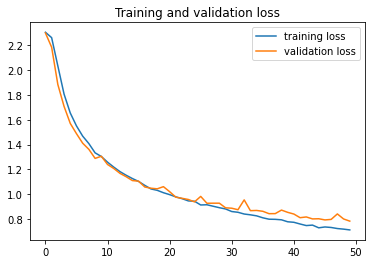

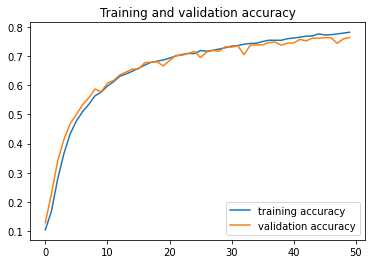

<Figure size 432x288 with 0 Axes>

In [493]:
# D.	Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same. 
accuracy      = training_history.history['accuracy']
val_accuracy  = training_history.history['val_accuracy']
loss     = training_history.history['loss']
val_loss = training_history.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot( epochs, loss, label = 'training loss' )
plt.plot( epochs, val_loss, label = 'validation loss' )
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss'   )
plt.figure();

plt.plot( epochs, accuracy, label = 'training accuracy' )
plt.plot( epochs, val_accuracy, label = 'validation accuracy' )
plt.title('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure();

#### Observations:

1) There are around 10 classes in the dataset which represent digits from 0-9.

2) We tried training a Neural Network with dense hidden layers of different number of units and are able to achieve a final test accuracy of 76.44-78.02% upto 50 epochs.

3) Also we can see that after a certain point the model might begin to overfit on the dataset; as is clear from the above plots where the validation loss begins to increase after certain point compared to the training loss and validation accuracy begins to decrease compared to the training accuracy.

## End of Part B

In [495]:
# convert colab .ipynb to .html
!jupyter nbconvert --to HTML Neural_Networks_Project.ipynb

[NbConvertApp] Converting notebook Neural_Networks_Project.ipynb to HTML
[NbConvertApp] Writing 1012483 bytes to Neural_Networks_Project.html


## End of Project